In [24]:
import pandas as pd

def get_weekly_deaths(country):
    df = pd.read_csv(f'../../data/worldometers/{country}.csv')
    weekly_deaths = []
    for week_end in range(len(df)-1, 6, -7):
        weekly_deaths.append(df.at[week_end,'coronavirus-deaths-linear'] - df.at[week_end-7,'coronavirus-deaths-linear'])
    return list(reversed(weekly_deaths))

countries = ['france', 'italy', 'spain', 'germany', 'sk']

country_curves = []
for country in countries:
    country_curves.append(get_weekly_deaths(country))

country_curves

[[0, 1, 17, 108, 547, 1932, 5472, 6315, 5325, 3138, 2039],
 [3, 38, 325, 1443, 3667, 5303, 5108, 4012, 3761, 2984, 2240],
 [0, 0, 17, 277, 1478, 5031, 5838, 4568, 3244, 2737, 2074],
 [0, 0, 0, 13, 81, 447, 1043, 1438, 1620, 1334, 890],
 [6, 15, 29, 25, 29, 48, 31, 31, 20, 8, 8]]

In [25]:
us_df = pd.read_csv(f'../../data/covid_tracker/us.csv').fillna(0)
us_df.head()

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200504,56,1173257,6111921.0,2791.0,50062.0,127397.0,9366.0,4579.0,4848.0,...,127397.0,7287969,7285178,7285178,0.0,938.0,1601.0,210561.0,21251.0,231812.0
1,20200503,56,1152006,5901360.0,2812.0,50312.0,125796.0,9292.0,4502.0,4761.0,...,125796.0,7056178,7053366,7053366,0.0,1158.0,1936.0,221838.0,26287.0,248125.0
2,20200502,56,1125719,5679522.0,1578.0,51734.0,123860.0,9403.0,4386.0,4845.0,...,123860.0,6806819,6805241,6805241,0.0,1651.0,2112.0,223393.0,30038.0,253431.0
3,20200501,56,1095681,5456129.0,1639.0,52370.0,121748.0,9205.0,4300.0,4707.0,...,121748.0,6553449,6551810,6551810,0.0,1743.0,9793.0,271571.0,33547.0,305118.0
4,20200430,56,1062134,5184558.0,2775.0,53793.0,111955.0,9486.0,4192.0,4712.0,...,111955.0,6249467,6246692,6246692,0.0,2091.0,2265.0,191545.0,28977.0,220522.0


In [26]:
us_weekly_deaths = []

for week_end in range(0, len(us_df)-7, 7):
    us_weekly_deaths.append(us_df.at[week_end,'death'] - us_df.at[week_end+7,'death'])
us_weekly_deaths.reverse()

In [27]:
country_curves.append(list(us_weekly_deaths))

In [28]:
curve_len = min([len(c) for c in country_curves])
country_curves = [c[-curve_len:] for c in country_curves]
country_curves

[[0, 1, 17, 108, 547, 1932, 5472, 6315, 5325, 3138, 2039],
 [3, 38, 325, 1443, 3667, 5303, 5108, 4012, 3761, 2984, 2240],
 [0, 0, 17, 277, 1478, 5031, 5838, 4568, 3244, 2737, 2074],
 [0, 0, 0, 13, 81, 447, 1043, 1438, 1620, 1334, 890],
 [6, 15, 29, 25, 29, 48, 31, 31, 20, 8, 8],
 [0.0,
  11.0,
  24.0,
  63.0,
  423.0,
  2539.0,
  7877.0,
  12817.0,
  14159.0,
  12414.0,
  12479.0]]

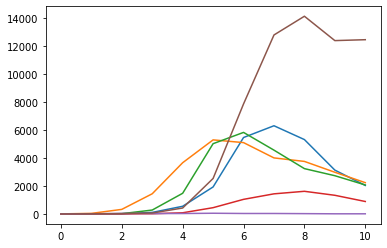

In [29]:
import matplotlib.pyplot as plt
for c in country_curves:
    plt.plot(c)
plt.show()

In [30]:
def get_weekly_cases(country):
    df = pd.read_csv(f'../../data/worldometers/{country}.csv')
    weekly_deaths = []
    for week_end in range(len(df)-1, 6, -7):
        weekly_deaths.append(df.at[week_end,'coronavirus-cases-linear'] - df.at[week_end-7,'coronavirus-cases-linear'])
    return list(reversed(weekly_deaths))

case_curves = []
for country in countries:
    case_curves.append(get_weekly_cases(country))

case_curves

[[0, 118, 1079, 4214, 10595, 24156, 47545, 32914, 27211, 14256, 6593],
 [154, 1544, 5674, 17372, 34391, 38551, 31259, 27415, 22609, 18703, 13042],
 [0, 82, 590, 7314, 20780, 51342, 51536, 35185, 31843, 27955, 20493],
 [0, 114, 910, 4773, 19060, 37562, 37688, 27731, 17888, 12028, 7894],
 [573, 3134, 3577, 849, 735, 686, 654, 275, 149, 67, 65]]

In [31]:
us_weekly_cases = []

for week_end in range(0, len(us_df)-7, 7):
    us_weekly_cases.append(us_df.at[week_end,'positive'] - us_df.at[week_end+7,'positive'])
us_weekly_cases.reverse()

In [32]:
us_weekly_cases

[0,
 1,
 0,
 0,
 51,
 960,
 5117,
 40883,
 118508,
 197944,
 213410,
 199544,
 204715,
 192123]

In [33]:
states_df = pd.read_csv(f'../../data/covid_tracker/states.csv').fillna(0)
states_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200504,AK,370.0,21353.0,0.0,12.0,0.0,0.0,0.0,0.0,...,0.0,21723.0,21723.0,21723.0,2,0.0,0.0,143.0,2.0,145.0
1,20200504,AL,8025.0,95092.0,0.0,0.0,1064.0,0.0,411.0,0.0,...,1064.0,103117.0,103117.0,103117.0,1,6.0,29.0,10317.0,300.0,10617.0
2,20200504,AR,3458.0,50984.0,0.0,91.0,438.0,0.0,0.0,16.0,...,438.0,54442.0,54442.0,54442.0,5,5.0,11.0,1525.0,27.0,1552.0
3,20200504,AS,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,83.0,83.0,83.0,60,0.0,0.0,26.0,0.0,26.0
4,20200504,AZ,8919.0,76334.0,0.0,703.0,1357.0,288.0,0.0,200.0,...,1357.0,85253.0,85253.0,85253.0,4,0.0,9.0,3855.0,279.0,4134.0


In [34]:
georgia_df = states_df[states_df['state'] == 'TX']
georgia_df.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
47,20200504,TX,32332.0,375066.0,0.0,1533.0,0.0,0.0,0.0,0.0,...,0.0,407398.0,407398.0,407398.0,48,17.0,0.0,16054.0,784.0,16838.0
103,20200503,TX,31548.0,359012.0,0.0,1540.0,0.0,0.0,0.0,0.0,...,0.0,390560.0,390560.0,390560.0,48,20.0,0.0,8886.0,1026.0,9912.0
159,20200502,TX,30522.0,350126.0,0.0,1725.0,0.0,0.0,0.0,0.0,...,0.0,380648.0,380648.0,380648.0,48,31.0,0.0,27580.0,1293.0,28873.0
215,20200501,TX,29229.0,322546.0,0.0,1778.0,0.0,0.0,0.0,0.0,...,0.0,351775.0,351775.0,351775.0,48,34.0,0.0,20333.0,1142.0,21475.0
271,20200430,TX,28087.0,302213.0,0.0,1686.0,0.0,0.0,0.0,0.0,...,0.0,330300.0,330300.0,330300.0,48,50.0,0.0,14477.0,1033.0,15510.0


In [35]:
import numpy as np

georgia_df.index = range(len(georgia_df))
ga_weekly_cases = []

for week_end in range(0, len(georgia_df)-7, 7):
    ga_weekly_cases.append(georgia_df.at[week_end,'positive'] - georgia_df.at[week_end+7,'positive'])
ga_weekly_cases.reverse()

np.array(ga_weekly_cases) / 7.0

array([   6.42857143,   42.14285714,  360.71428571,  628.42857143,
        947.14285714,  793.14285714,  834.14285714, 1005.        ])